In [36]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read bike data
fall19bs=gpd.read_file('D:/AT Census/Replica Data/Fall 2019 Saturday_bike_data/replica-test-03_22_23-network_link_layer.geojson')
fall19bs['season']='Fall'
fall19bs['year']=2019
fall19bs['mode']='bike'
fall19bs['avg_vol']=fall19bs['volume']/13
fall19bs['day']='Saturday'

fall19bth=gpd.read_file('D:/AT Census/Replica Data/Fall2019_Thursday_Bike_data/replica-test-03_22_23-network_link_layer.geojson')
fall19bth['season']='Fall'
fall19bth['year']=2019
fall19bth['mode']='bike'
fall19bth['avg_vol']=fall19bth['volume']/13
fall19bth['day']='Thursday'

sp21bs=gpd.read_file('D:/AT Census/Replica Data/Spring2021_saturday_bike_data/replica-test-03_22_23-network_link_layer.geojson')
sp21bs['season']='Spring'
sp21bs['year']=2021
sp21bs['mode']='bike'
sp21bs['avg_vol']=sp21bs['volume']/13
sp21bs['day']='Saturday'

sp21bth=gpd.read_file('D:/AT Census/Replica Data/Spring2021_Thursday_bike_data/replica-test-03_22_23-network_link_layer.geojson')
sp21bth['season']='Spring'
sp21bth['year']=2021
sp21bth['mode']='bike'
sp21bth['avg_vol']=sp21bth['volume']/13
sp21bth['day']='Thursday'

fall21bs=gpd.read_file('D:/AT Census/Replica Data/Fall2021_Saturday_Bike_data/replica-test-03_22_23-network_link_layer.geojson')
fall21bs['season']='Fall'
fall21bs['year']=2021
fall21bs['mode']='bike'
fall21bs['avg_vol']=fall21bs['volume']/13
fall21bs['day']='Saturday'

fall21bth=gpd.read_file('D:/AT Census/Replica Data/Fall2021_Thursday_bike_data/Fall2021_Thursday_bike_data.geojson')
fall21bth['season']='Fall'
fall21bth['year']=2021
fall21bth['mode']='bike'
fall21bth['avg_vol']=fall21bth['volume']/13
fall21bth['day']='Thursday'

In [3]:
# combine all bike replica data for fall 2019, spring 2021 and fall 2021
replica_bike_data=pd.concat([fall19bs,fall19bth,sp21bs,sp21bth,fall21bs,fall21bth],axis=0)
replica_bike_data.shape

(119946, 17)

In [4]:
replica_bike_data.head()

,networkLinkId,roadName,direction,startLat,endLat,startLon,endLon,highway,volume,distance,osmId,geometry,season,year,mode,avg_vol,day
0,8696527078660862000,San Francisco – Oakland Bay Bridge,Southwest,37.808107,37.785977,-122.367299,-122.391050,motorway,2188,2.004910,8921938,"LINESTRING (-122.36730 37.80811, -122.39045 37...",Fall,2019,bike,168.307692,Saturday
1,516240361778316700,I 80,West,37.824258,37.824045,-122.317611,-122.318334,motorway,2160,0.042193,781148912,"LINESTRING (-122.31761 37.82426, -122.31833 37...",Fall,2019,bike,166.153846,Saturday
2,9223372036854775807,I 80,West,37.822612,37.822180,-122.322936,-122.327795,motorway,2160,0.267602,781148922,"LINESTRING (-122.32294 37.82261, -122.32359 37...",Fall,2019,bike,166.153846,Saturday
3,9223372036854775807,I 80,West,37.824045,37.823280,-122.318334,-122.320289,motorway,2160,0.119333,781148916,"LINESTRING (-122.31833 37.82404, -122.31914 37...",Fall,2019,bike,166.153846,Saturday
4,9223372036854775807,I 80,West,37.823280,37.822612,-122.320289,-122.322936,motorway,2160,0.152472,781148917,"LINESTRING (-122.32029 37.82328, -122.32069 37...",Fall,2019,bike,166.153846,Saturday


In [93]:
replica_bike_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# crs = {'init': 'epsg:4326'}
# gdf = gpd.GeoDataFrame(replica_bike_data, crs=crs, geometry = 'geometry')
# gdf.to_file("D:/AT Census/Replica Data/replica_bike_data.json",DRIVER='GEOJSON')

In [6]:
replica_bike_data.shape,replica_bike_data['networkLinkId'].nunique()

((119946, 17), 34984)

<AxesSubplot: xlabel='day', ylabel='avg_vol'>

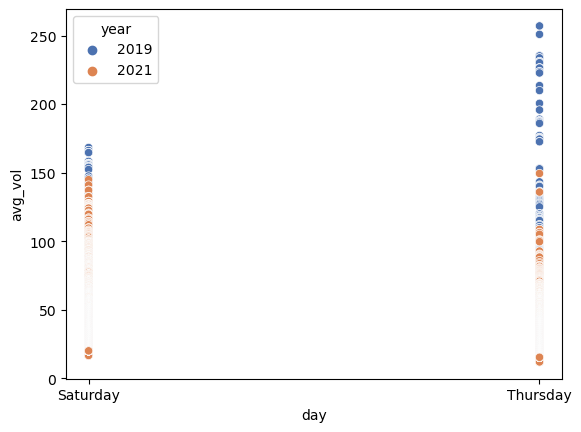

In [7]:
sns.scatterplot(data=replica_bike_data, x="day", y="avg_vol", hue="year",palette="deep")

In [8]:
repl_bike_data=pd.DataFrame({'replica_ave_vol':replica_bike_data.groupby(['networkLinkId','year','day'])['avg_vol'].mean()}).reset_index()
repl_bike_data.head()

,networkLinkId,year,day,replica_ave_vol
0,245649653869825,2021,Thursday,27.230769
1,330511701583554,2021,Saturday,38.230769
2,427485479927542,2019,Saturday,32.461538
3,427485479927542,2021,Saturday,18.307692
4,427485479927542,2021,Thursday,15.076923


<AxesSubplot: >

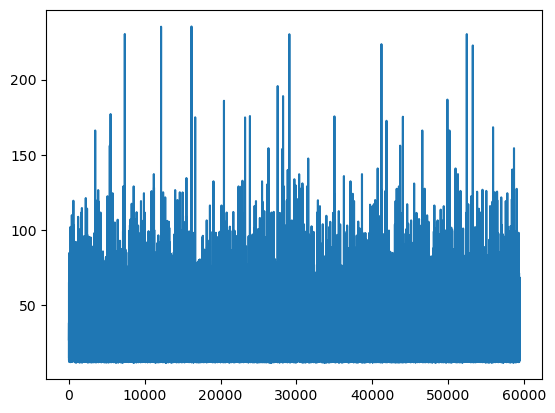

In [9]:
repl_bike_data['replica_ave_vol'].plot()

In [10]:
repl_bike_data.shape

(59482, 4)

In [11]:
# Now read eco bike data
eco_bike_data=pd.read_csv('D:/AT Census/Replica Data/eco_daily_bike_volume_2021_2018_data_full_month.csv')
eco_bike_data.head()

,Unnamed: 0,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month,no_of_days_data_collected
0,0,671,2018,1,1,Monday,1,109.0,24,109.0,24,night,7.0,day,102.0,0,0,2018-01-01,31,31
1,1,671,2018,1,2,Tuesday,1,58.0,24,167.0,48,night,9.0,day,49.0,0,0,2018-01-02,31,31
2,2,671,2018,1,3,Wednesday,1,46.0,24,213.0,72,night,12.0,day,34.0,0,0,2018-01-03,31,31
3,3,671,2018,1,4,Thursday,1,32.0,24,245.0,96,night,1.0,day,31.0,0,0,2018-01-04,31,31
4,4,671,2018,1,5,Friday,1,20.0,24,265.0,120,night,0.0,day,20.0,0,0,2018-01-05,31,31


In [12]:
eco_bike_data19=eco_bike_data.loc[eco_bike_data['year']==2019]
eco_bike_data19_v1=eco_bike_data19[(eco_bike_data19['month']>8)& (eco_bike_data19['month']<12)]
eco_bike_data19_v1['season']='Fall'
eco_bike_data21=eco_bike_data.loc[eco_bike_data['year']==2021]
eco_bike_data21_v1=eco_bike_data21[(eco_bike_data21['month']>2)&(eco_bike_data21['month']<6)]
eco_bike_data21_v1['season']='Spring'
eco_bike_data21_v2=eco_bike_data21[(eco_bike_data21['month']>8)&(eco_bike_data21['month']<12)]
eco_bike_data21_v2['season']='Fall'
eco_bike_data=pd.concat([eco_bike_data21_v1,eco_bike_data21_v2,eco_bike_data19_v1],axis=0)

C:\Users\mmmiah\AppData\Local\Temp\ipykernel_1672\2042297518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_bike_data19_v1['season']='Fall'
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_1672\2042297518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco_bike_data21_v1['season']='Spring'
C:\Users\mmmiah\AppData\Local\Temp\ipykernel_1672\2042297518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [13]:
eco_bike_data19_v1['month'].unique()

array([ 9, 10, 11], dtype=int64)

In [14]:
eco_bike_data.head()

,Unnamed: 0,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,...,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month,no_of_days_data_collected,season
941,1064,671,2021,3,1,Monday,9,33.0,24,60151.0,...,night,1.0,day,32.0,0,0,2021-03-01,31,31,Spring
942,1065,671,2021,3,2,Tuesday,9,23.0,24,60174.0,...,night,4.0,day,19.0,0,0,2021-03-02,31,31,Spring
943,1066,671,2021,3,3,Wednesday,9,37.0,24,60211.0,...,night,10.0,day,27.0,0,0,2021-03-03,31,31,Spring
944,1067,671,2021,3,4,Thursday,9,49.0,24,60260.0,...,night,4.0,day,45.0,0,0,2021-03-04,31,31,Spring
945,1068,671,2021,3,5,Friday,9,45.0,24,60305.0,...,night,6.0,day,39.0,0,0,2021-03-05,31,31,Spring


In [15]:
eco_bike_data1=pd.DataFrame({'eco_ave_vol':eco_bike_data.groupby(['ID','year','Day of Week'])['Daily_volume'].mean()}).reset_index()
eco_bike_data1=eco_bike_data1.rename(columns={'Day of Week':'day'})
eco_bike_data1.head()

,ID,year,day,eco_ave_vol
0,671,2019,Friday,44.923077
1,671,2019,Monday,40.076923
2,671,2019,Saturday,64.076923
3,671,2019,Sunday,69.307692
4,671,2019,Thursday,40.461538


<AxesSubplot: >

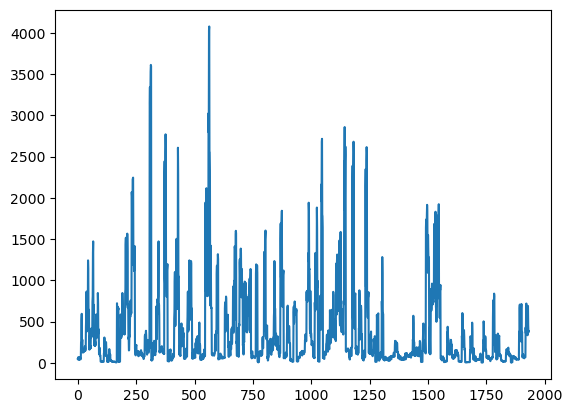

In [16]:
eco_bike_data1['eco_ave_vol'].plot()

In [17]:
# read bike counter data
bdata=pd.read_csv('D:/AT Census/Replica Data/Bike_permanent_counter_2018_2021_MADT_with_location_data.csv')
bdata1=bdata[(bdata['year']==2019) | (bdata['year']==2021)]
bdata2=bdata1.drop_duplicates(subset=['ID','latitude','longitude','year'], keep='first')
bdata2.to_csv('D:/AT Census/Replica Data/bike_2019_2021_unique_counters.csv')

In [18]:
bdata2.shape

(321, 20)

In [19]:
# Now read eco_replica matching data
eco_replica=gpd.read_file('D:/AT Census/Replica Data/eco_replica_bike_data_match_mar22.shp')
eco_replica1=eco_replica[['ID','networkLin','geometry']]
eco_replica2=eco_replica1.rename(columns={'networkLin':'networkLinkId'})
eco_replica2.head()

,ID,networkLinkId,geometry
0,3576,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
1,3576,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
2,3603,9223372036854775807,POINT Z (-117.20073 32.75331 0.00000)
3,90943,9223372036854775807,POINT Z (-118.25422 34.04571 0.00000)
4,91773,9223372036854775807,POINT Z (-118.26148 34.04734 0.00000)


In [20]:
eco_replica.columns

Index(['Join_Count', 'TARGET_FID', 'Field1', 'Unnamed__0', 'Unnamed__1', 'ID',
       'location', 'latitude', 'longitude', 'year', 'month', 'MTT',
       'days_in_mo', 'Simple_MAD', 'AASHTO_MAD', 'diff', 'type', 'road',
       'city', 'county', 'state', 'country', 'networkLin', 'roadName',
       'direction', 'startLat', 'endLat', 'startLon', 'endLon', 'highway',
       'volume', 'distance', 'osmId', 'season', 'mode', 'avg_vol', 'day',
       'geometry'],
      dtype='object')

In [21]:
eco_replica2['networkLinkId']=eco_replica2['networkLinkId'].astype(np.int64)

In [22]:
eco_bike_data1.shape,eco_replica.shape

((1932, 4), (79, 38))

In [23]:
# Combine with eco data
eco_bike_data2=pd.merge(eco_bike_data1, eco_replica2, on=['ID'], how='inner')
eco_bike_data2.head()

,ID,year,day,eco_ave_vol,networkLinkId,geometry
0,3576,2019,Friday,324.875,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
1,3576,2019,Friday,324.875,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
2,3576,2019,Monday,317.000,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
3,3576,2019,Monday,317.000,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)
4,3576,2019,Saturday,586.000,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000)


In [24]:
eco_bike_data2.shape

(819, 6)

In [25]:
eco_replica_bike_data2=pd.merge(eco_bike_data2,repl_bike_data,on=['networkLinkId','year','day'], how='inner')
eco_replica_bike_data2.shape

(158, 7)

In [26]:
eco_replica_bike_data2.head()

,ID,year,day,eco_ave_vol,networkLinkId,geometry,replica_ave_vol
0,3576,2019,Saturday,586.000000,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000),42.853532
1,3576,2019,Saturday,586.000000,9223372036854775807,POINT Z (-117.10370 32.64904 0.00000),42.853532
2,3603,2019,Saturday,20.250000,9223372036854775807,POINT Z (-117.20073 32.75331 0.00000),42.853532
3,5218,2019,Saturday,172.692308,9223372036854775807,POINT Z (-122.41935 37.77826 0.00000),42.853532
4,5220,2019,Saturday,106.153846,9223372036854775807,POINT Z (-122.40697 37.75882 0.00000),42.853532


In [27]:
d19=eco_replica_bike_data2.loc[eco_replica_bike_data2['year']==2019]
d19.shape

(66, 7)

In [28]:
d19['ID'].nunique()

23

<AxesSubplot: xlabel='replica_ave_vol', ylabel='eco_ave_vol'>

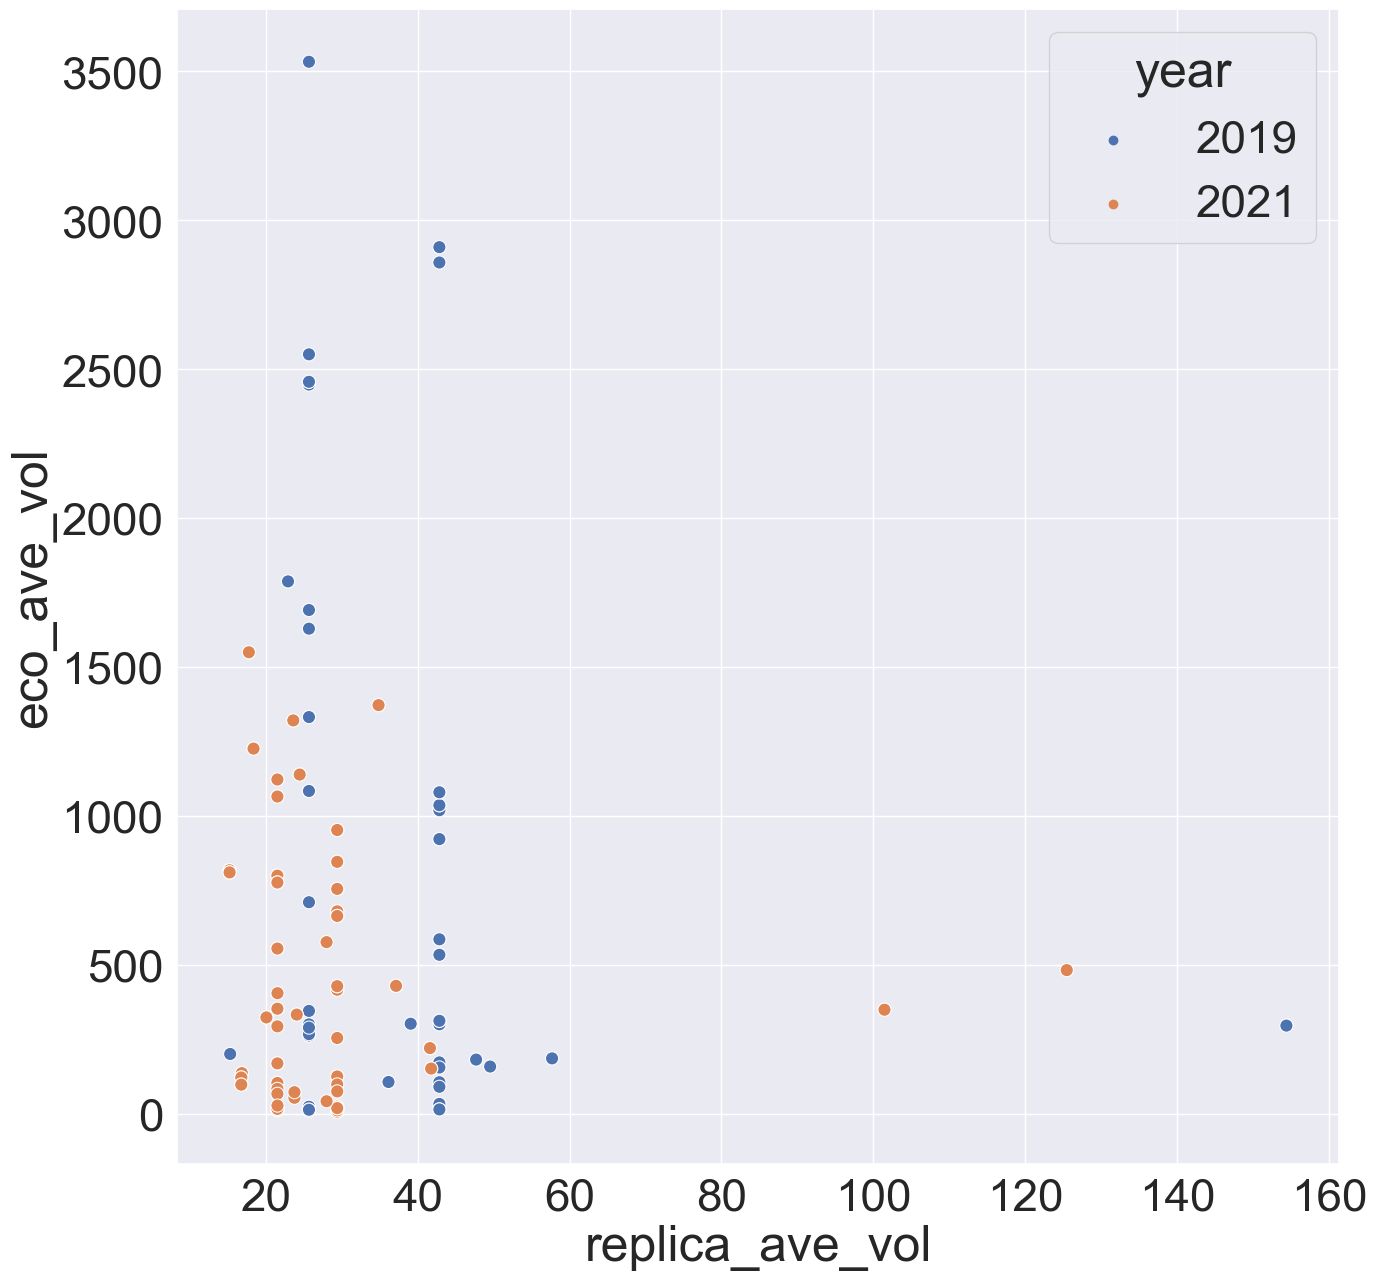

In [29]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=3.0)
sns.scatterplot(data=eco_replica_bike_data2, x="replica_ave_vol", y="eco_ave_vol", hue="year", palette="deep",s=90)

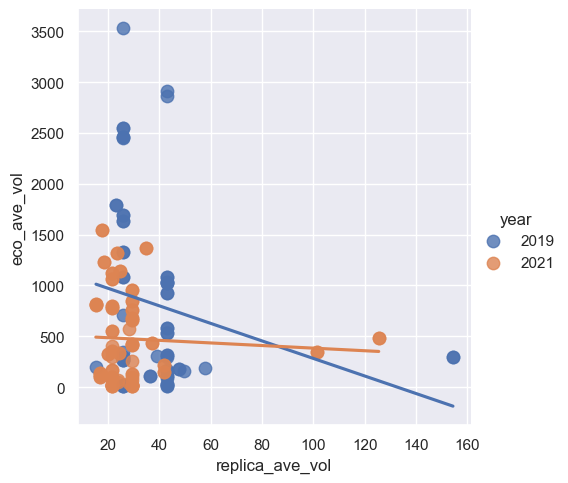

In [50]:
sns.set(rc={'figure.figsize':(80,80)})
sns.set(font_scale=1.0)
sns.lmplot(x="replica_ave_vol", y="eco_ave_vol",data=eco_replica_bike_data2, hue="year", palette="deep",ci=None, scatter_kws={"s": 80})

<AxesSubplot: xlabel='replica_ave_vol', ylabel='eco_ave_vol'>

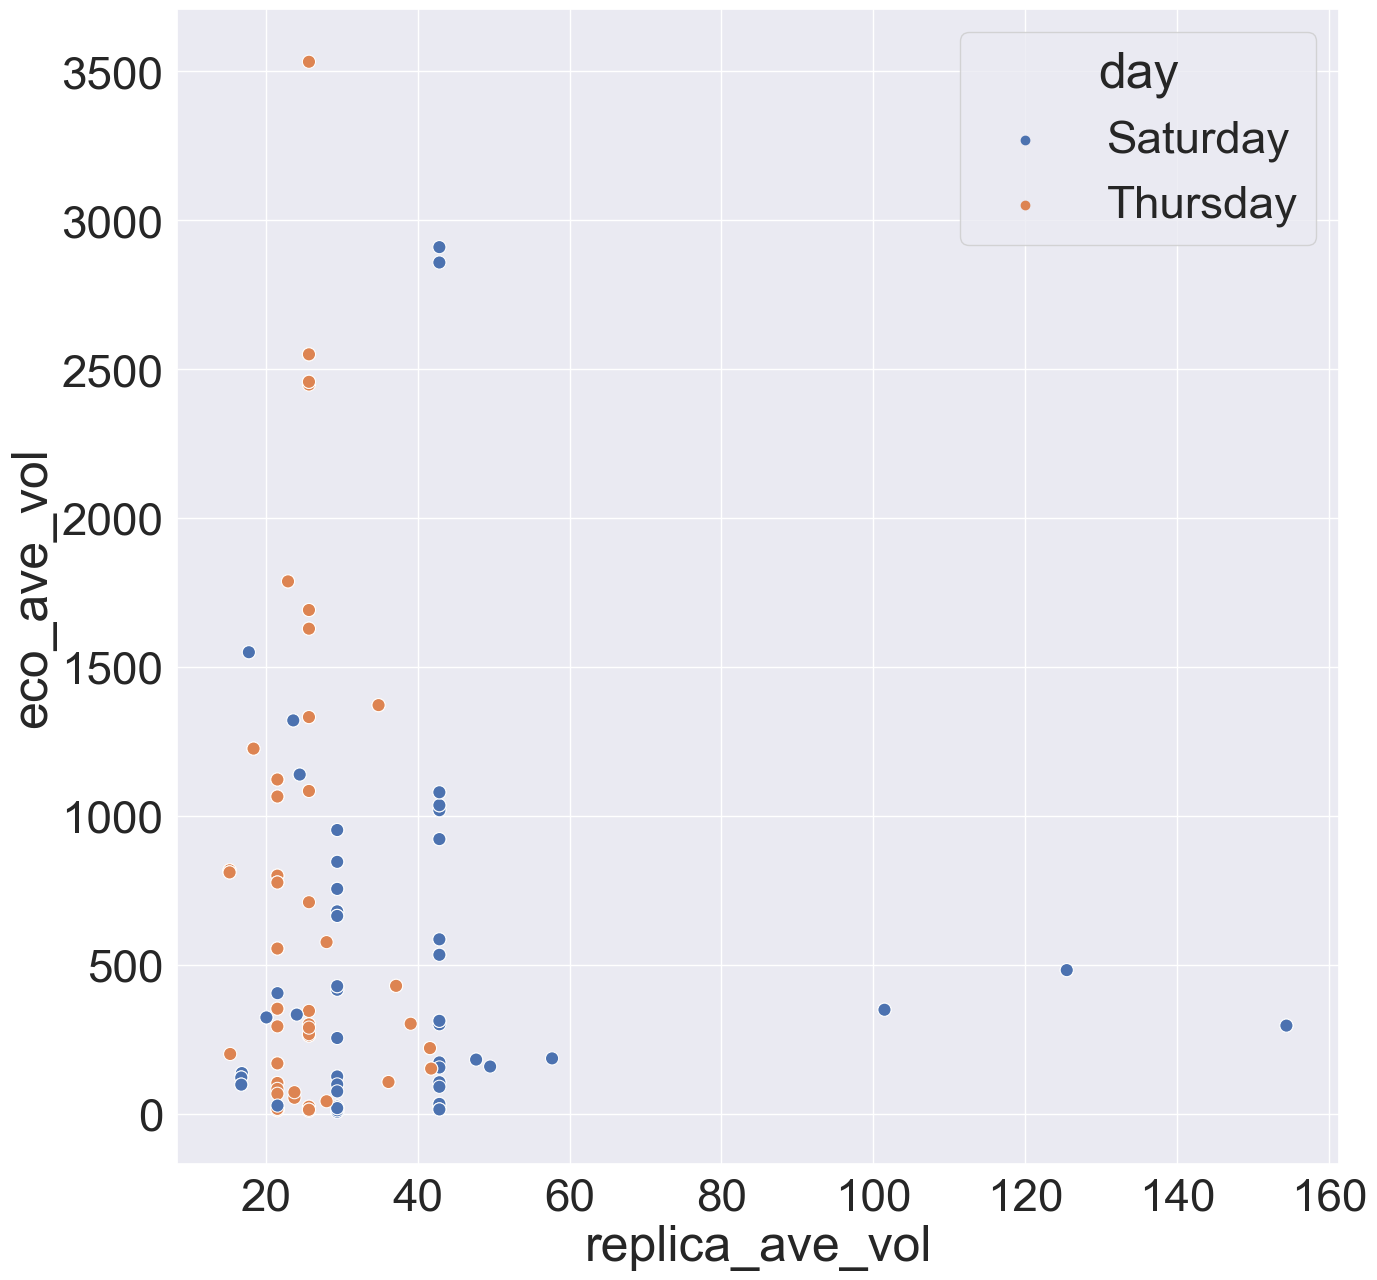

In [51]:
sns.set(rc={'figure.figsize':(15,15)})
sns.set(font_scale=3.0)
sns.scatterplot(data=eco_replica_bike_data2, x="replica_ave_vol", y="eco_ave_vol", hue="day", palette="deep",s=90)

Text(0, 0.5, 'Replica_Factor')

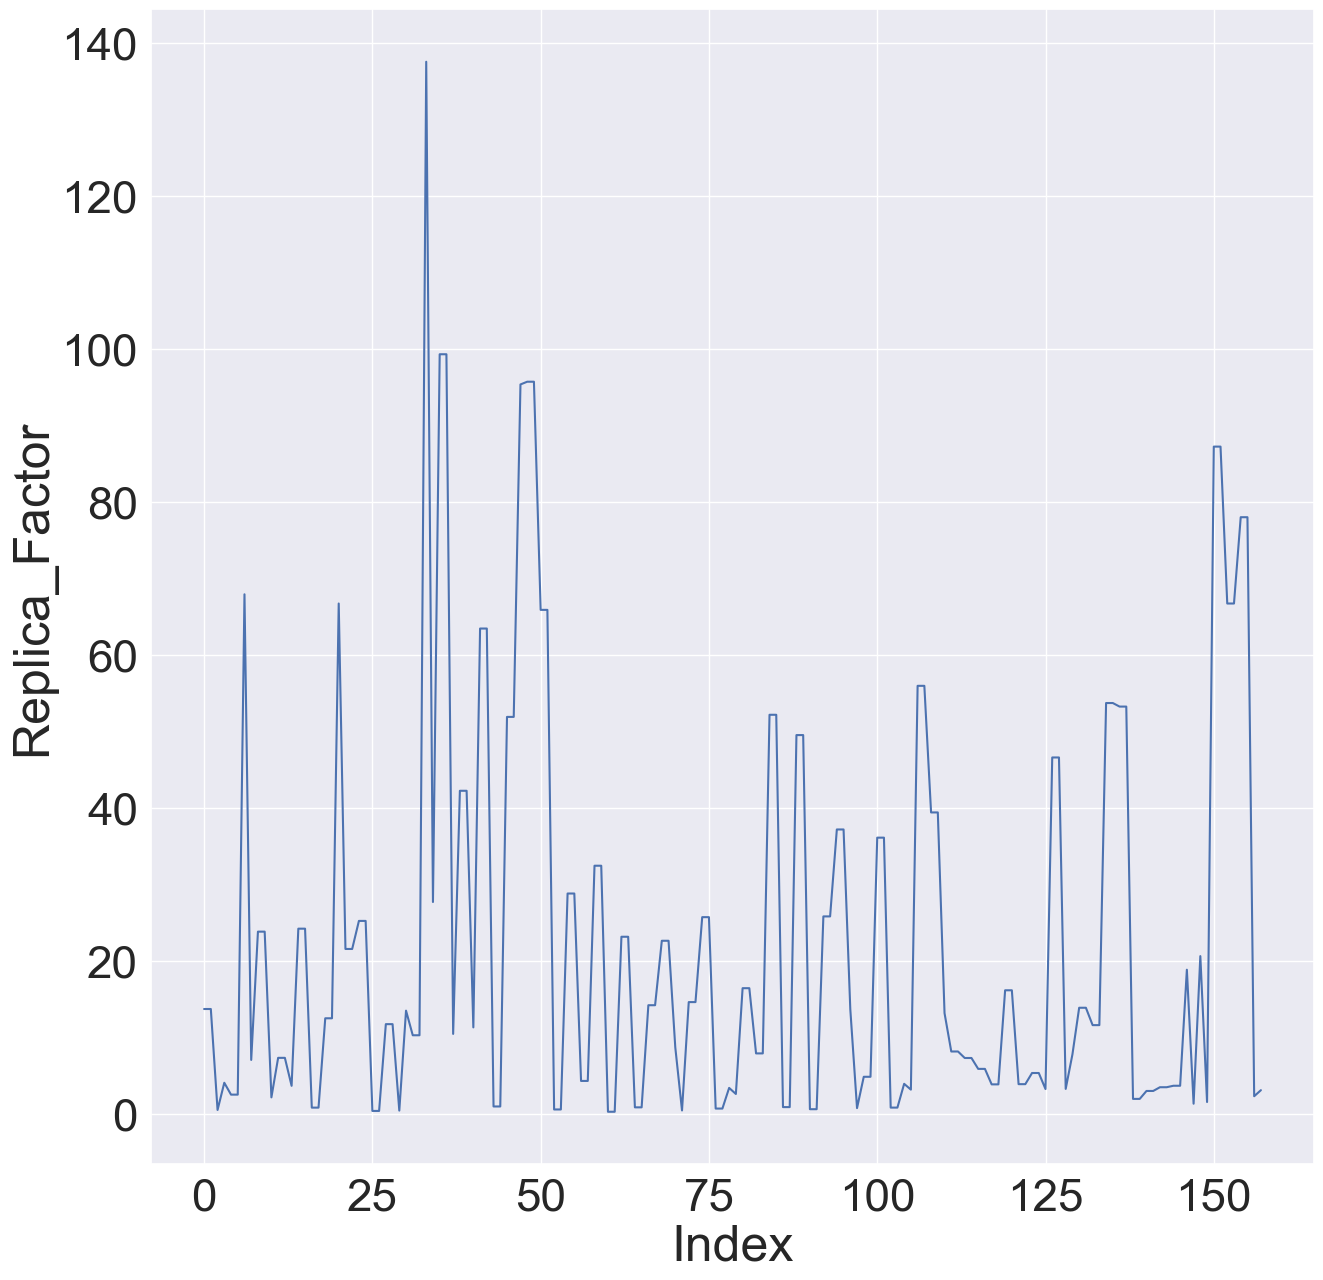

In [52]:
eco_replica_bike_data2['factor']=eco_replica_bike_data2['eco_ave_vol']/eco_replica_bike_data2['replica_ave_vol']
eco_replica_bike_data2['factor'].plot()
plt.xlabel('Index')
plt.ylabel('Replica_Factor')

In [53]:
eco_replica_bike_data2['factor'].describe()

count    158.000000
mean      23.047872
std       26.960161
min        0.238085
25%        3.378117
50%       12.461050
75%       35.165302
max      137.553012
Name: factor, dtype: float64

# end of the coding